In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rjmanoj/credit-card-customer-churn-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\smc\.cache\kagglehub\datasets\rjmanoj\credit-card-customer-churn-prediction\versions\1


In [2]:
import pandas as pd
import os
file=os.listdir(path)
file


['Churn_Modelling.csv']

In [3]:
df=pd.read_csv(os.path.join(path, 'Churn_Modelling.csv'))

In [4]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
cat_cols=['RowNumber', 'CustomerId','Surname']
df.drop(cat_cols, axis=1, inplace=True)

In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df=pd.get_dummies(df,columns=['Geography', 'Gender'], drop_first=True)

In [10]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


In [12]:
x=df.iloc[:,:-1]
y=df['Exited']

In [13]:
x.shape

(10000, 11)

In [14]:
y.shape

(10000,)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
x_train , x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
x_train.shape

(8000, 11)

In [18]:
ss=StandardScaler()
x_tarin_scaled=ss.fit_transform(x_train)
x_test_scaled= ss.transform(x_test)

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [33]:
model=Sequential()
model.add(Dense(3, activation='sigmoid', input_dim=11 ))
# model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid' ))

C:\Users\smc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [36]:
history=model.fit(x_tarin_scaled, y_train, epochs=8, validation_split=0.2)

Epoch 1/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2088 - loss: 0.9914 - val_accuracy: 0.2200 - val_loss: 0.8060
Epoch 2/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3111 - loss: 0.7561 - val_accuracy: 0.7937 - val_loss: 0.6330
Epoch 3/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8417 - loss: 0.6063 - val_accuracy: 0.8938 - val_loss: 0.5251
Epoch 4/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8766 - loss: 0.5078 - val_accuracy: 0.8625 - val_loss: 0.4552
Epoch 5/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8425 - loss: 0.4456 - val_accuracy: 0.8444 - val_loss: 0.4016
Epoch 6/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8350 - loss: 0.3941 - val_accuracy: 0.8569 - val_loss: 0.3546
Epoch 7/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8574 - loss: 0.3500 - val_accuracy: 0.8963 - val_loss: 0.3108
Epoch 8/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9118 - loss: 0.2990 - val_accuracy: 0.9556 - v

In [37]:
model.layers[0].get_weights()

[array([[-0.35967797,  0.02332279, -0.07147601],
        [ 0.37840432, -0.71906173,  0.33148623],
        [ 0.35588253,  0.08430481,  0.01665646],
        [ 0.74567455, -0.08229763,  0.10190452],
        [-0.36848718, -0.00424492,  0.00251217],
        [ 0.07957944, -0.02048453, -0.01032985],
        [-0.70799476,  0.4269817 , -0.15839042],
        [-0.08412266, -0.03081974,  0.01690492],
        [ 0.25587383, -1.388765  ,  1.4121393 ],
        [ 0.03238777, -0.34210023,  0.05327462],
        [ 0.08551405, -0.10494614, -0.02505325]], dtype=float32),
 array([-0.41721815,  1.2815864 , -0.80140823], dtype=float32)]

In [38]:
model.layers[1].get_weights()

[array([[ 0.06435239],
        [-1.2281219 ],
        [ 1.15773   ]], dtype=float32),
 array([-0.8176975], dtype=float32)]

In [39]:
pred=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [40]:
import numpy as np
y_pred=np.where(pred>0.5,1,0)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred)

0.958

In [43]:
import matplotlib.pyplot as plt
history.history

{'accuracy': [0.20937499403953552,
  0.4493750035762787,
  0.866406261920929,
  0.8610937595367432,
  0.8381249904632568,
  0.8349999785423279,
  0.8706250190734863,
  0.9204687476158142],
 'loss': [0.9286546111106873,
  0.7152462601661682,
  0.5787770748138428,
  0.4935184121131897,
  0.43332332372665405,
  0.3834106922149658,
  0.33761271834373474,
  0.2947797477245331],
 'val_accuracy': [0.2199999988079071,
  0.793749988079071,
  0.893750011920929,
  0.862500011920929,
  0.8443750143051147,
  0.8568750023841858,
  0.8962500095367432,
  0.9556249976158142],
 'val_loss': [0.8060163855552673,
  0.6330108046531677,
  0.5250928401947021,
  0.45522063970565796,
  0.4016484022140503,
  0.3545999228954315,
  0.31078267097473145,
  0.27042293548583984]}

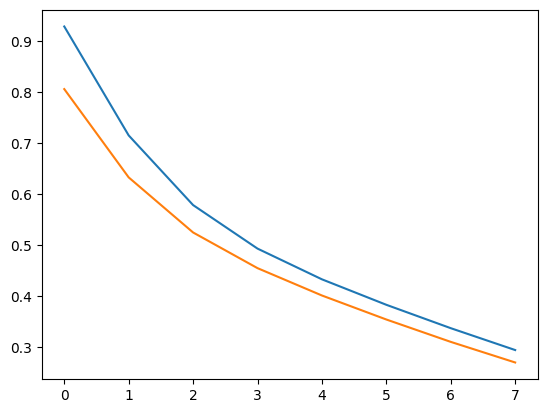

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


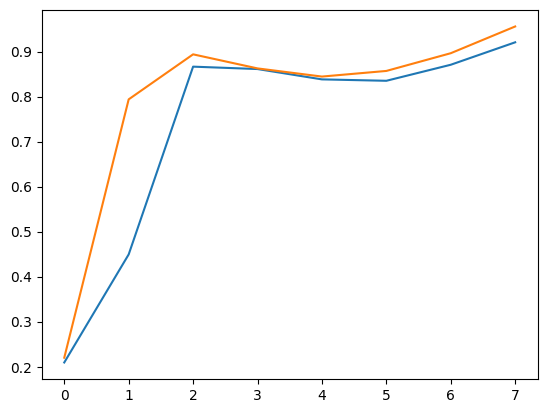

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
